In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__ )
print(keras.__version__)
print("hello")

2023-06-09 13:05:41.304922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2.11.0
2.11.0
hello


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_41693/1127659990.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_41693/1127659990.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [6]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [45]:
X_train.shape

(30162, 41)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               4200      
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])


0        0
1        0
2        1
3        1
5        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 15060, dtype: int64

In [18]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4333 - accuracy: 0.7907 - val_loss: 0.3760 - val_accuracy: 0.8168
Epoch 2/100
943/943 [==============================] - 1s 912us/step - loss: 0.3778 - accuracy: 0.8107 - val_loss: 0.3698 - val_accuracy: 0.8151
Epoch 3/100
943/943 [==============================] - 1s 906us/step - loss: 0.3747 - accuracy: 0.8110 - val_loss: 0.3693 - val_accuracy: 0.8157
Epoch 4/100
943/943 [==============================] - 1s 904us/step - loss: 0.3707 - accuracy: 0.8149 - val_loss: 0.3605 - val_accuracy: 0.8236
Epoch 5/100
943/943 [==============================] - 1s 907us/step - loss: 0.3685 - accuracy: 0.8169 - val_loss: 0.3698 - val_accuracy: 0.8271
Epoch 6/100
943/943 [==============================] - 1s 907us/step - loss: 0.3681 - accuracy: 0.8164 - val_loss: 0.3737 - val_accuracy: 0.8152
Epoch 7/100
943/943 [==============================] - 1s 906us/step - loss: 0.3684 - accuracy: 0.8149 - val_loss: 0.3660 - val_accu

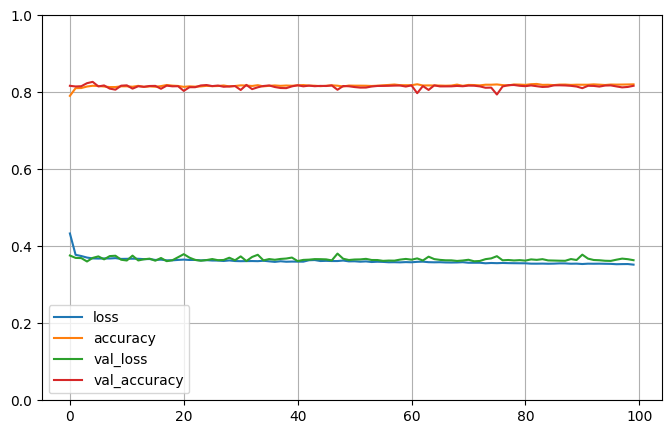

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 516us/step - loss: 0.3638 - accuracy: 0.8169


[0.36383894085884094, 0.816865861415863]

In [24]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred = np.argmax(model.predict(X_test),axis=1))

471/471 [==============================] - 0s 426us/step


0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)
scaler.transform(train)
scaler.fit(test)
scaler.transform(test)


X_train = np.asarray(train.drop("wage_class",axis=1)).astype('float32')
y_train = np.asarray(train.wage_class).astype('float32')

X_test = np.asarray(test.drop("wage_class",axis=1)).astype('float32')
y_test = np.asarray(test.wage_class).astype('float32')


In [32]:

history1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history1 = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4239 - accuracy: 0.7947 - val_loss: 0.3757 - val_accuracy: 0.8134
Epoch 2/100
943/943 [==============================] - 1s 917us/step - loss: 0.3766 - accuracy: 0.8119 - val_loss: 0.3687 - val_accuracy: 0.8142
Epoch 3/100
943/943 [==============================] - 1s 914us/step - loss: 0.3733 - accuracy: 0.8137 - val_loss: 0.3681 - val_accuracy: 0.8169
Epoch 4/100
943/943 [==============================] - 1s 913us/step - loss: 0.3710 - accuracy: 0.8143 - val_loss: 0.3652 - val_accuracy: 0.8149
Epoch 5/100
943/943 [==============================] - 1s 913us/step - loss: 0.3647 - accuracy: 0.8220 - val_loss: 0.3603 - val_accuracy: 0.8208
Epoch 6/100
943/943 [==============================] - 1s 911us/step - loss: 0.3599 - accuracy: 0.8264 - val_loss: 0.3520 - val_accuracy: 0.8297
Epoch 7/100
943/943 [==============================] - 1s 913us/step - loss: 0.3682 - accuracy: 0.8148 - val_loss: 0.3858 - val_accu

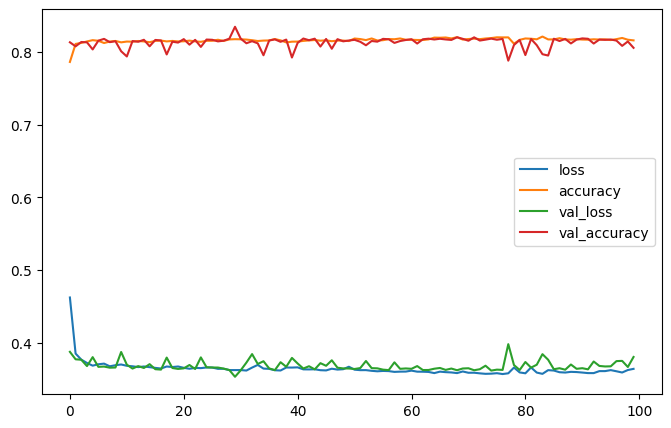

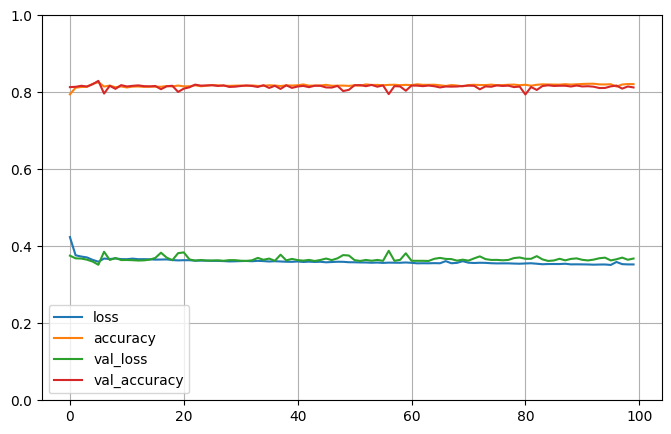

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()